In [1]:
# imports
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/jamesclare/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load data
all_patents_df = pd.read_csv('../intermediate_csv_files/clean_raw_data.csv', parse_dates=['filing_date','grant_date'])

# delete extra "Unnamed" column
del all_patents_df['Unnamed: 0']

# create new column 'prosecution_period' as difference between grant date and filing date
all_patents_df['prosecution_period'] = all_patents_df.grant_date - all_patents_df.filing_date

# convert timedelta to integer number of days
all_patents_df.prosecution_period = all_patents_df.prosecution_period.apply(lambda x: x.days)

**Focusing on Utility Patents**

For the purposes of fitting a linear regression model to our data, we first limit the data to utility patents.  This is because, in the patent industry, the other types of patents (e.g., design, plant) typically have a single claim and will therefore not be useful for regressions to predict prosecution time.  We rely on utility patents which have a greater degree of variation in the number of claims and figures from one patent to the next.

In [3]:
# focus only on utility patents
utility_patents_df = all_patents_df[all_patents_df.application_type=='utility']

# rename 'number-of-claims' using underscores
utility_patents_df = utility_patents_df.rename(columns={'number-of-figures':'number_of_figures'})

In [4]:
utility_patents_df.head()

,application_number,application_type,city,country,filing_date,grant_date,invention_title,number-of-drawing-sheets,number_of_figures,number_of_claims,patent_number,state,prosecution_period
649,14840940,utility,New Holland,US,2015-08-31,2017-10-31,Vertical tillage scraper,8,8,10,09801321,PA,792
650,15033989,utility,Tremont,US,2014-11-08,2017-10-31,"Implement weight management systems, methods, ...",13,16,19,09801322,IL,1088
651,14537206,utility,New Holland,US,2014-11-10,2017-10-31,Rocker link lift system,4,4,12,09801323,PA,1086
652,14619305,utility,Horace,US,2015-02-11,2017-10-31,Bi-fold tool bar linkage,4,10,17,09801324,ND,993
653,14411774,utility,London,CA,2013-06-27,2017-10-31,Hub cover for agriculture purposes,6,6,9,09801325,outside US,1587


In [5]:
full_model = ols('prosecution_period ~ number_of_figures + number_of_claims', utility_patents_df).fit()

In [6]:
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:     prosecution_period   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     462.5
Date:                Sun, 20 May 2018   Prob (F-statistic):          2.71e-201
Time:                        08:42:42   Log-Likelihood:            -2.5137e+06
No. Observations:              319983   AIC:                         5.027e+06
Df Residuals:                  319980   BIC:                         5.027e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1030.6445      2.44

In [7]:
nof_model = ols('prosecution_period ~ number_of_figures', utility_patents_df).fit()
print(nof_model.summary())

                            OLS Regression Results                            
Dep. Variable:     prosecution_period   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sun, 20 May 2018   Prob (F-statistic):           6.51e-87
Time:                        08:42:42   Log-Likelihood:            -2.5140e+06
No. Observations:              319983   AIC:                         5.028e+06
Df Residuals:                  319981   BIC:                         5.028e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1079.0631      1.26

In [8]:
noc_model = ols('prosecution_period ~ number_of_claims', utility_patents_df).fit()
print(noc_model.summary())

                            OLS Regression Results                            
Dep. Variable:     prosecution_period   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     466.1
Date:                Sun, 20 May 2018   Prob (F-statistic):          2.65e-103
Time:                        08:42:42   Log-Likelihood:            -2.5140e+06
No. Observations:              319983   AIC:                         5.028e+06
Df Residuals:                  319981   BIC:                         5.028e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1020.9149      2.405  

In [9]:
five_yr_df = utility_patents_df[utility_patents_df.prosecution_period < 1825]

In [10]:
full_model_5yr = ols('prosecution_period ~ number_of_figures + number_of_claims', five_yr_df).fit()

In [11]:
print(full_model_5yr.summary())

                            OLS Regression Results                            
Dep. Variable:     prosecution_period   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     221.8
Date:                Sun, 20 May 2018   Prob (F-statistic):           5.71e-97
Time:                        08:42:42   Log-Likelihood:            -2.1381e+06
No. Observations:              288000   AIC:                         4.276e+06
Df Residuals:                  287997   BIC:                         4.276e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           921.9939      1.70

In [12]:
noc_model_5yr = ols('prosecution_period ~ number_of_claims', five_yr_df).fit()
print(noc_model_5yr.summary())

                            OLS Regression Results                            
Dep. Variable:     prosecution_period   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8503
Date:                Sun, 20 May 2018   Prob (F-statistic):              0.356
Time:                        08:42:43   Log-Likelihood:            -2.1384e+06
No. Observations:              288000   AIC:                         4.277e+06
Df Residuals:                  287998   BIC:                         4.277e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          915.6074      1.674  

In [13]:
nof_model_5yr = ols('prosecution_period ~ number_of_figures', five_yr_df).fit()
print(nof_model_5yr.summary())

                            OLS Regression Results                            
Dep. Variable:     prosecution_period   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     437.7
Date:                Sun, 20 May 2018   Prob (F-statistic):           4.01e-97
Time:                        08:42:43   Log-Likelihood:            -2.1381e+06
No. Observations:              288000   AIC:                         4.276e+06
Df Residuals:                  287998   BIC:                         4.276e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           925.5359      0.85

**Conclusion:** based on these summaries, the linear regression model is not explaining a significant amount of the variance observed in the data (i.e., less than 1%).  We do see that the number of figures, when used as the sole predictor variable, explains more of the variance than the number of claims, which suggests that the number of figures in an application has more to do with the prosecution time.  Also of note, the correlation between the number of figures and the prosecution time is negative, which implies that increasing the number of figures in an application may help decrease prosecution time, although the correlation is week.  

**IMPROVING THE MODEL: REVIEW OF INFLUENCE AND LEVERAGE POINTS**

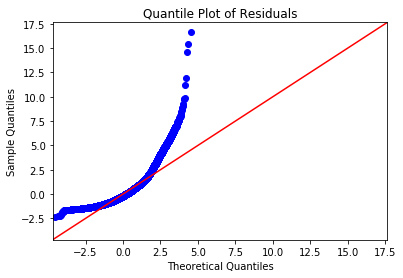

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# reviewing the quantile plot of residuals
resid = full_model.resid
mean = np.mean(resid)
sd = np.std(resid)
z = (resid - mean) / sd

sm.qqplot(z, line='45')
plt.title('Quantile Plot of Residuals')
plt.show()

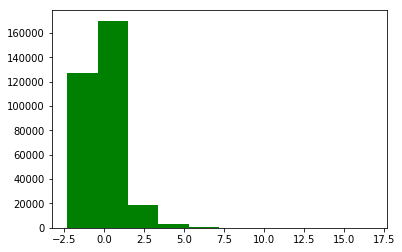

In [15]:
plt.hist(z, color='g')
plt.show()

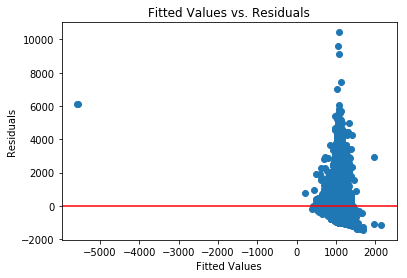

In [16]:
# scatter plot: fitted vs. residuals
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(c='red')
plt.title('Fitted Values vs. Residuals')
plt.show()